1. Clean the disease chapter and put it in Chapters Cleaned.
2. Gather all diseases and their data from the cleaned chapter.
3. Extract the symptoms from diseases from the cleaned chapter using Gemini

In [143]:
with open("ChaptersRaw/everything_about_dogs_diseases.txt", "r") as file:
    content = file.read()

In [144]:
#Remove the DISEASE number from the content
import re
content = re.sub(r"[^\w\n]*\d*\s*DISEASES?\b\s*\d*", "", content)

In [145]:
print(content)


Asthma. â€” This  is  a  common  disease  and  a  most  distressing  complaint, 
its  victims  being  mostly  found  among  house  pets  and  toy  dogs  that  have 
been  overfed  with  a  too  rich  diet,  and  lack  of  exercise  as  well.  Almast  every 
toy  dog  so  improperly  cared  for  and  fed  will  develop  asthma  as  they  get 
along  in  years.  The  grossness  of  body  induces  and  fosters  it  and  often 
causes  as  well  a  kind  of  scurvy  mange,  the  coat  feeling  harsh  and  dry  with 
a  rough  and  dirty  look.  The  symptoms  are  distressing  paroxysms  of  cough- 
ing with  great  difficulty  in  breathing,  which  occur  frequently.  The  symp- 
toms exhibited  are  due  to 'thickening  of  the  mucus  lining  of  the  trachea  and 
bronchial  tubes  which  by  lessening  the  calibre  of  the  respiratory  tract  in- 
terferes with  the  act  of  breathing  which  is  attended  by  a  loud,  wheezing 
noise.  The  blood  is  imperfectly  aereated  and

In [146]:
lines = content.split("\n")

In [147]:
#Remove special charachers except this "-"
for i in range(len(lines)):
    lines[i] = re.sub(r"[^a-zA-Z0-9â€”\s]", "", lines[i])
    lines[i] = re.sub(r"\s+", " ", lines[i])  # Replace multiple spaces with a single space

content = "\n".join(lines)


In [148]:
print(content)


Asthma â€” This is a common disease and a most distressing complaint 
its victims being mostly found among house pets and toy dogs that have 
been overfed with a too rich diet and lack of exercise as well Almast every 
toy dog so improperly cared for and fed will develop asthma as they get 
along in years The grossness of body induces and fosters it and often 
causes as well a kind of scurvy mange the coat feeling harsh and dry with 
a rough and dirty look The symptoms are distressing paroxysms of cough 
ing with great difficulty in breathing which occur frequently The symp 
toms exhibited are due to thickening of the mucus lining of the trachea and 
bronchial tubes which by lessening the calibre of the respiratory tract in 
terferes with the act of breathing which is attended by a loud wheezing 
noise The blood is imperfectly aereated and the visible mucous mem 
branes congested and dark in color Pugs and aged Spaniels seem pre 
disposed to asthmatic troubles which while not usually 

In [149]:
content

'\nAsthma â€” This is a common disease and a most distressing complaint \nits victims being mostly found among house pets and toy dogs that have \nbeen overfed with a too rich diet and lack of exercise as well Almast every \ntoy dog so improperly cared for and fed will develop asthma as they get \nalong in years The grossness of body induces and fosters it and often \ncauses as well a kind of scurvy mange the coat feeling harsh and dry with \na rough and dirty look The symptoms are distressing paroxysms of cough \ning with great difficulty in breathing which occur frequently The symp \ntoms exhibited are due to thickening of the mucus lining of the trachea and \nbronchial tubes which by lessening the calibre of the respiratory tract in \nterferes with the act of breathing which is attended by a loud wheezing \nnoise The blood is imperfectly aereated and the visible mucous mem \nbranes congested and dark in color Pugs and aged Spaniels seem pre \ndisposed to asthmatic troubles which whi

In [150]:
#To get seperate chunks of diseases.
#Find the list of all diseases. This might include some non disease entries.
#Then filter them.

matches = re.findall(r"\n\n([^\n]*?)\s*â€”", content) # To sumarize i am looking for \n \n<anything inside>â€”

In [151]:
if "Asthama" not in matches:
    # Add "Asthma" to the list if it's not already present
    matches.insert(0, "Asthma")  # Add "Asthma" at the beginning since its first word does not start with double line

In [152]:
matches

['Asthma',
 'Apoplexy',
 'Abscess',
 'In a large number of cases',
 'Abortion',
 'Asphyxia',
 'Bladder Inflammation of the',
 'Bladder Paralysis',
 'necessary muscular power',
 'BOILS',
 'Blood Poverty of the',
 'Bites',
 'Bowels Inflammation of Enteritis Peritonitis',
 'Colic comes on quickly and is relieved by rubbing the stomach',
 'Causes',
 'Symptoms',
 'Treatment',
 'Give injections of lukewarm water and castile soap',
 'Bad Breath',
 'Balanatis',
 'Liniment for Sprains Bruises Etc',
 'Burns and Scalds',
 'Burns',
 'Baldness',
 'Blain',
 'Symptoms',
 'Treatment',
 'Brain Inflammation of the Meningitis',
 'Blisters',
 'Boils',
 'Blotch',
 'Lotion for Blotch',
 'Breeding To Prevent',
 'Bronchocele',
 'Bronchitis',
 'Treatment',
 'Bowels Intussusception',
 'Breasts Inflammation',
 'Biliousness',
 'Bladder irritable',
 'Broken Bones',
 'Bowels Obstruction of the Constipation or Costiveness',
 'BLACK TONGUE',
 'BLACK TONGUE OR THE NEW',
 'Sig',
 'Colic',
 'Claws Inflammation at the Ro

In [153]:
#I manually went to through the text and removed some entries that were not diseases.
filtered_matches =['Asthma',
 'Apoplexy',
 'Abscess',
 'Abortion',
 'Asphyxia',
 'Bladder Inflammation of the',
 'Bladder Paralysis',
 'BOILS',
 'Blood Poverty of the',
 'Bites',
 'Bowels Inflammation of Enteritis Peritonitis',
 'Colic comes on quickly and is relieved by rubbing the stomach',
 'Bad Breath',
 'Balanatis',
 'Liniment for Sprains Bruises Etc',
 'Burns and Scalds',
 'Burns',
 'Baldness',
 'Blain',
 'Brain Inflammation of the Meningitis',
 'Blisters',
 'Boils',
 'Blotch',
 'Breeding To Prevent',
 'Bronchocele',
 'Bronchitis',
 'Bowels Intussusception',
 'Breasts Inflammation',
 'Biliousness',
 'Bladder irritable',
 'Broken Bones',
 'Bowels Obstruction of the Constipation or Costiveness',
 'BLACK TONGUE',
 'BLACK TONGUE OR THE NEW',
 'Sig',
 'Colic',
 'Claws Inflammation at the Roots of',
 'Concussion of the Brain',
 'Constipation',
 'Cough',
 'Cuts Tears or Wounds',
 'Chorea',
 'Cramp',
 'Stimulating Liniment',
 'Crooked Limbs',
 'Cancer',
 'Choking',
 'Coryza',
 'Costiveness',
 'Caked Breast',
 'Claws Overgrown',
 'Cold in the Head',
 'Clipping Toe Nails',
 'Callosities',
 'Chronic Catarrh of Uterus',
 'Chest Founder',
 'Catarrh or Cold in the Head',
 'Calculi',
 'Dew Claws',
 'Debility and Wasting',
 'Docking Tails',
 'Dysentery',
 'Diarrhea',
 'Dislocations',
 'Dropsy',
 'Dyspepsia',
 'Diabetes',
 'Astringent Bolus for Diabetes',
 'Diptheria',
 'Deafness',
 'Epilepsy',
 'Eye Amaurosis of the',
 'Eyeball Protrusion of',
 'Eyes Watery or Weeping',
 'Eyelashes Turned in',
 'Haw Enlargement of',
 'Eye Opthalmia of the',
 'Eye Cataract of the',
 'Ear Canker Internal',
 'Ear Canker External',
 'Enlarged Joints',
 'Ear Polypus in the',
 'Enteritis',
 'Erythema',
 'Eczema',
 'Treatment',
 'Fatness Excessive',
 'Fleas',
 'Fistula in Anus',
 'Flatulency',
 'Foreign Bodies in the Intestines',
 'False Joint',
 'Fatty Degeneration of the Heart',
 'Warty Growths on the Valves of the Heart',
 'Follicular Mange',
 'Founder of the Chest',
 'Fracture',
 'Gatherings',
 'Glass Eye',
 'Glossitis',
 'Fractures',
 'Fits',
 'Fits are of common occurrence especially in puppies',
 'Fits Due to Worms',
 'Feet Sore',
 'âGoitre or Bronchocelc',
 'Gatherings',
 'Gastritis',
 'Gleet',
 'Heart Valvular Disease of',
 'Harvest Bugs',
 'Haematuria Bloody Urine',
 'Hepatitis Inflammation of the Liver',
 'Hernia Umbilical',
 'Husk',
 'Pills for Husky Cough',
 'Tonic Stomachic Pills',
 'Honie Sickness',
 'Hookworms',
 'Indigestion Dyspepsia',
 'Inversion of the Vagina',
 'Influenza',
 'IrLs Inflammation or',
 'Injury to the Brain',
 'Intussusception',
 'Jaundice or the Yellows and Inflammation of he Liver Hepatitis',
 'Mercurial Treatment of Jaundice',
 'Mixture for Jaundice',
 'Kennel Lameness or ChestFounder',
 'Liniment for Rheumatism',
 'Mixture for Rheumatism',
 'Keeping Flies Off Ear and Nose',
 'Lice',
 'LockJaw Tetanus',
 'Looseness of the Bowels',
 'Lumbago',
 'Leucorrhoea',
 'Lacteal Tumors',
 'Lniment for Drying Bitches',
 'Labor Premature',
 'Laryngitis or Inflammation of the Upper Part of the Windpipe',
 'Lungs Inflammation of Pneumonia Pleurisy',
 'Mange',
 'Sarcoptic Mange',
 'Symptoms of Scaroptic Mange',
 'Mouth Canker of the',
 'MilkGlands Inflammation of the',
 'Meningitis',
 'Milk Absence of',
 'MawAVorms',
 'Navel Hernia or Rupture',
 'Nephritis',
 'Obesity',
 'Ozoena',
 'Poisoning',
 'Cantharides Spanish Fly',
 'Strichnine',
 'Ground Glass',
 'Parasites External',
 'Dog Louse',
 'Pleurisy',
 'Pneumonia',
 'Peritonitis',
 'Penis Discharge from Balanitis',
 'Paralysis',
 'Paralysis in Bitches Before Parturition',
 'Piles',
 'Ointments for Piles',
 'Wash for Tumor j',
 'Parturient Apoplexy',
 'Pleurisy',
 'Pharyngitis Inflammation of the Pharynx',
 'Polypus',
 'Pulse',
 'Purging',
 'Polypi',
 'Rheumatism',
 'Ribs Fracture of',
 'Ringworm',
 'Rickets',
 'Septicemia Puerperalis and Inflammation of the Uterus',
 'Sarcoptie Mange',
 'Scalds',
 'Scurf or Crusty Ears',
 'Surfiet',
 'Scrofula',
 'Scrotal Irritation',
 'St Vitus Dance',
 'Sprains',
 'Stomach Inflammation of Gastritis',
 'Treatment',
 'Sunstroke',
 'Spinal Meningitis',
 'Symptoms',
 'Temperature and PuLse',
 'Tetanus',
 'Testicles Enlarged',
 'Tapeworm',
 'Tartar on the Teeth',
 'Tears',
 'Teeth',
 'Displaced Teeth',
 'Caries or Diseased Teeth',
 'Abscess of the Jaw',
 'Teeth Decayed',
 'Turnside',
 'Tumors',
 'Calcareous Tumors',
 'Tongue Inflammation of Glossitis',
 'Tongue Paralysis of',
 'Tongue Ulcers on the',
 'Worming the Tongue',
 'Water in Chest',
 'Worms',
 'Tape Worm',
 'Maw Worms',
 'Yellows The']

In [154]:
diseases = {}
prev_index = 0
forward_content = content+"" #A replica
prev_end_index = 0

indices = []
for i in range(len(filtered_matches)-1):
    #Get the disease contents between the match and the next match 
    match = filtered_matches[i]

    next_match = filtered_matches[i + 1]

    start_index = forward_content.find(match)
    end_index = forward_content.find(next_match)

    disease_content = forward_content[start_index:end_index].strip()
    diseases[match] = disease_content

    forward_content = forward_content[end_index:]  # Move forward in the content

    print(match,next_match,start_index+prev_end_index,end_index+prev_end_index)
    indices.append(start_index + prev_end_index)  # Store the start index
    indices.append(end_index + prev_end_index)  # Store the end index
    prev_end_index += end_index #Update the previous end index. The end index is nothing but length


#Filtering out diseases is done. Although they will contain some advertisements.

Asthma Apoplexy 1 7940
Apoplexy Abscess 7940 7964
Abscess Abortion 7964 10635
Abortion Asphyxia 10635 13102
Asphyxia Bladder Inflammation of the 13102 13875
Bladder Inflammation of the Bladder Paralysis 13875 15373
Bladder Paralysis BOILS 15373 18919
BOILS Blood Poverty of the 18919 19868
Blood Poverty of the Bites 19868 19907
Bites Bowels Inflammation of Enteritis Peritonitis 19907 22778
Bowels Inflammation of Enteritis Peritonitis Colic comes on quickly and is relieved by rubbing the stomach 22778 29957
Colic comes on quickly and is relieved by rubbing the stomach Bad Breath 29957 33766
Bad Breath Balanatis 33766 34749
Balanatis Liniment for Sprains Bruises Etc 34749 35678
Liniment for Sprains Bruises Etc Burns and Scalds 35678 35959
Burns and Scalds Burns 35959 35959
Burns Baldness 35959 37696
Baldness Blain 37696 38186
Blain Brain Inflammation of the Meningitis 38186 43514
Brain Inflammation of the Meningitis Blisters 43514 44039
Blisters Boils 44039 44105
Boils Blotch 44105 44812


0 22955


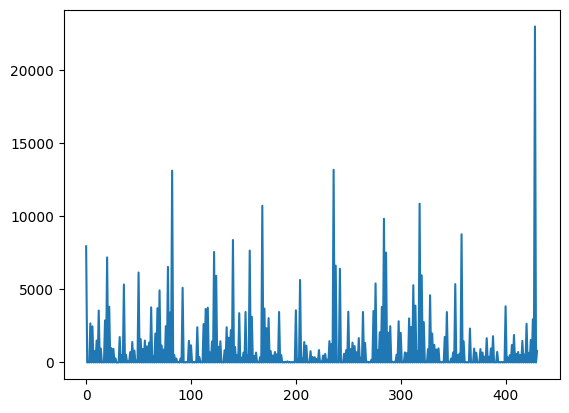

In [155]:
import matplotlib.pyplot as plt
import numpy as np
indices_delta = np.diff(indices)
plt.plot(indices_delta)

print(min(indices_delta), max(indices_delta))



In [156]:
np.where(indices_delta > 20000)  # Find indices where the difference is greater than 1000

(array([428]),)

In [157]:
indices[420:] #Second last has high number of words

[403557,
 406202,
 406202,
 406858,
 406858,
 408395,
 408395,
 411349,
 411349,
 434304,
 434304,
 435103]

In [158]:
keys = list(diseases.keys())

print(diseases[keys[-2]])  # Access the content of the 420th disease . This is the worms discription,

Tape Worms I warned against 
the use of Areca Nut 

Better give too small a dose than an over dose of any Vermifuge 
and give it oftener or as long as you see signs of the dog having worms 
The three principle kinds that infest dogs are 

First â€” The Common Round or Stomach Worm of a pale pink or flesh 
color pointed at both ends and from two to six inches long in appearance 
very much like the common earth or fish worm this kind is most common 
in puppies 

Second â€” The Tape Worm which is made up of flat sections joined to 
gether and these sections being from a quarter to an inch in length and 
in color nearly white the tail being the largest and longest section which 
gradually gets smaller and shorter toward the head to such an extent that it 
looks to the naked eye as fine as a thread Under a strong glass this part 
will look like a lot of very small beads strung on a fine thread Here is 
where to look for the head which is described by Stonehenge as follows 
The head is small

In [159]:
print(diseases[keys[-1]]) #The last one is filled properly.

Maw Worms â€” Treatment for Maw Worms â€” These can be reached and 
expelled by the following injection per rectum Aloes 1 dram Put the 
aloes into a tea cup of warm water and then put it into a bottle Inject 
once every day until no more are to be seen passing from the dog Use 
rubber syringe and hold rear part of the dog up for five minutes after 
injecting It will do no harm and facilitate matters by having given an 
hour beforehand a dose of Kamala see tape worm as the Kamala will 
give dog a thorough cleaning out and with this start expel a lot of these 
worms The Kamala need only be given once in treating for maw worms 
â€” the first day you begin treating dog 

Another good injection for rectum or maw worms is a solution of 
quassia chips A handful steeped in water for six hours


In [160]:
#Now there are some diseases where there is no explanation but points to another disease.
#For such case we go through diseases and check what diseases they point to.

for key in diseases: 
    if "See" in diseases[key] and len(diseases[key]) < 200: #The threshold is arbitrary, but it should be less than the average disease description length
        # Extract the disease name from the text
        #print(f"{key} points to another disease.")
        print(diseases[key])

#Lets find the discriprion lengths of diseases which are referencing.


Apoplexy â€” See Fits
Blood Poverty of the â€” See Anaemia
Blisters â€” See general remarks under heading of Medical Terms
Bronchocele â€” This is an enlargement of the thyroid glands the prin 
cipal cartilage of the larynx See Goitre
Crooked Limbs â€” See Rickets
Coryza â€” See Catarrh
Costiveness â€” See Constipation
Cold in the Head â€” See Catarrh
Clipping Toe Nails â€” See Overgrown Claws
Chest Founder â€” See Kennel Lameness 

â€
Dyspepsia â€” See Indigestion
Enteritis â€” See Bowels Inflammation of
Follicular Mange â€” See Mange
Founder of the Chest â€” See Kennel Lameness
Fracture â€” See Bones Broken 


82 âGastritis See Stomach Inflammation of
Gatherings â€” See Abscesses
Glass Eye â€” See Amaruosis
Glossitis â€” See Tongue Inflammation of
Hepatitis Inflammation of the Liver â€” See Jaundice
Inversion of the Vagina â€” See Uterus Inversion of
IrLs Inflammation or â€” See Iritis
Looseness of the Bowels â€” See Diarrhea and Dysentery
Lumbago â€” See Rheumatism
MilkGlands Inflam

(array([38.,  3.,  2.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   20.  ,   281.66,   543.32,   804.98,  1066.64,  1328.3 ,
         1589.96,  1851.62,  2113.28,  2374.94,  2636.6 ,  2898.26,
         3159.92,  3421.58,  3683.24,  3944.9 ,  4206.56,  4468.22,
         4729.88,  4991.54,  5253.2 ,  5514.86,  5776.52,  6038.18,
         6299.84,  6561.5 ,  6823.16,  7084.82,  7346.48,  7608.14,
         7869.8 ,  8131.46,  8393.12,  8654.78,  8916.44,  9178.1 ,
         9439.76,  9701.42,  9963.08, 10224.74, 10486.4 , 10748.06,
        11009.72, 11271.38, 11533.04, 11794.7 , 12056.36, 12318.02,
        12579.68, 12841.34, 13103.  ]),
 <BarContainer object of 50 artists>)

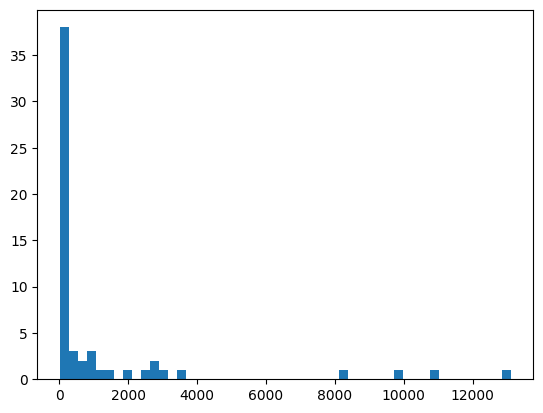

In [161]:
discription_lengths = []
for key in diseases:
    if "See" in diseases[key]:
        discription_lengths.append(len(diseases[key]))
plt.hist(discription_lengths, bins=50)

#In histogram, major discription are of length 20 chars. But what are the ones with 281?

In [162]:
'''
(array([39.,  3.,  2.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   20.  ,   281.66,   543.32,   804.98,  1066.64,  1328.3 ,
         1589.96,  1851.62,  2113.28,  2374.94,  2636.6 ,  2898.26,
         3159.92,  3421.58,  3683.24,  3944.9 ,  4206.56,  4468.22,
         4729.88,  4991.54,  5253.2 ,  5514.86,  5776.52,  6038.18,
         6299.84,  6561.5 ,  6823.16,  7084.82,  7346.48,  7608.14,
         7869.8 ,  8131.46,  8393.12,  8654.78,  8916.44,  9178.1 ,
         9439.76,  9701.42,  9963.08, 10224.74, 10486.4 , 10748.06,
        11009.72, 11271.38, 11533.04, 11794.7 , 12056.36, 12318.02,
        12579.68, 12841.34, 13103.  ]),
'''

for key in diseases: 
    dis_len = len(diseases[key])
    if "See" in diseases[key] and (dis_len<1000) and (dis_len>500): #Lets
        print(diseases[key])
        



Foreign Bodies in the Intestines â€” This is another cause of obstruc 
tion in the bowels to which dogs are peculiarly liable Pieces of bone are 
swallowed of such size and substance that they pass through the diges 
tive organs very slightly diminished and getting into the smaller intestines 
cannot pass farther so that feces accumulate and harden until if not re 
lieved inflammation is set up Sometimes stones are swallowed and cause 
obstruction and this will at once demonstrate the danger of throwing 
stones for dogs to retrieve for in their eagerness they are apt to swallow 
them especially if small Wool or rabbit fur swallowed is likely to ball 
together with other matter See Obstruction of Bowels
Intussusception â€” See Bowels Obstruction of â€” This is a slipping of 
one portion of the intestines that has been contracted by spasm within 
another part retaining its natural diameter and is another and not uncom 
mon cause of obstruction and apt to occur during spasmodic colic It i

In [163]:
#Even larger discriptions have some "See" references. 
#In such cases, we might need to use additional context retrieval for it. Probably Agentic one. 

In [164]:
new_json_content = {}
for key in diseases:
    new_json_content[key] = diseases[key].strip()

import json
with open("ChaptersCleaned/everything_about_dogs_diseases.json", "w") as json_file:
    json.dump(new_json_content, json_file, indent=4)

### Working on references.
The diseases reference each other, hence we need add additional fields to relate the diseases.
The goal now is to assign a unique ID to each disease and then relate them to each other.

In [1]:
#Load the json file.
diseases_json = {}
import json
with open("ChaptersCleaned/everything_about_dogs_diseases.json", "r") as json_file:
    diseases_json = json.load(json_file)

We are going to use Pydantic AI for agentic AI workflow to return a reference in a structured format.

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()  # defaults to looking for .env in the current directory

gemini_api_key = os.getenv("GEMINI_API_KEY")

In [3]:
diseases_id_prompt = "\n"
for i,diseases_name in enumerate(diseases_json.keys()):
    diseases_id_prompt += f"{i+1}: {diseases_name}\n"
print(diseases_id_prompt)

ref_system_prompt = '''
You are a helpful assistant that provides information about various dog diseases. Each disease has a unique identifier, and you will be given a disease ID to look up its details.
You will be provided with a list of diseases. Your task is to respond with the details of the disease associated with the given disease. That is which diseases does the given diseases refer to.
In case it matches provide the exact disease names as a list.
Some times diseases refer be not present in the list, in such cases you can provide the disease names that are not present in the list.
'''
ref_system_prompt += diseases_id_prompt + "\n\n"


1: Asthma
2: Apoplexy
3: Abscess
4: Abortion
5: Asphyxia
6: Bladder Inflammation of the
7: Bladder Paralysis
8: BOILS
9: Blood Poverty of the
10: Bites
11: Bowels Inflammation of Enteritis Peritonitis
12: Colic comes on quickly and is relieved by rubbing the stomach
13: Bad Breath
14: Balanatis
15: Liniment for Sprains Bruises Etc
16: Burns and Scalds
17: Burns
18: Baldness
19: Blain
20: Brain Inflammation of the Meningitis
21: Blisters
22: Boils
23: Blotch
24: Breeding To Prevent
25: Bronchocele
26: Bronchitis
27: Bowels Intussusception
28: Breasts Inflammation
29: Biliousness
30: Bladder irritable
31: Broken Bones
32: Bowels Obstruction of the Constipation or Costiveness
33: BLACK TONGUE
34: BLACK TONGUE OR THE NEW
35: Sig
36: Colic
37: Claws Inflammation at the Roots of
38: Concussion of the Brain
39: Constipation
40: Cough
41: Cuts Tears or Wounds
42: Chorea
43: Cramp
44: Stimulating Liniment
45: Crooked Limbs
46: Cancer
47: Choking
48: Coryza
49: Costiveness
50: Caked Breast
51: 

In [14]:
import asyncio
from pydantic import BaseModel, Field
from pydantic_ai import Agent

class DiseaseReference(BaseModel):  
    reference_diseases: list[str] = Field(description='List of disease names that this disease references. Ensure the spelling is correct.')
    is_out_of_list: bool = Field(description='Indicates if the referenced diseases are out of the provided list. If true, the diseases are not present in the list.')

reference_agent = Agent(model="google-gla:gemini-2.0-flash",output_type=DiseaseReference) #Create an agent without tool but with output format

In [6]:
keys = list(diseases_json.keys())
diseases_with_sees = []
for key in diseases_json.keys():
    if "See" in diseases_json[key]:
        diseases_with_sees.append(key)
diseases_with_sees

['Apoplexy',
 'Blood Poverty of the',
 'Blisters',
 'Bronchocele',
 'Chorea',
 'Crooked Limbs',
 'Coryza',
 'Costiveness',
 'Cold in the Head',
 'Clipping Toe Nails',
 'Chest Founder',
 'Catarrh or Cold in the Head',
 'Dyspepsia',
 'Epilepsy',
 'Eye Amaurosis of the',
 'Enlarged Joints',
 'Enteritis',
 'Fleas',
 'Flatulency',
 'Foreign Bodies in the Intestines',
 'Follicular Mange',
 'Founder of the Chest',
 'Fracture',
 'Gatherings',
 'Glass Eye',
 'Glossitis',
 'Hepatitis Inflammation of the Liver',
 'Hernia Umbilical',
 'Inversion of the Vagina',
 'IrLs Inflammation or',
 'Intussusception',
 'Kennel Lameness or ChestFounder',
 'Lice',
 'Looseness of the Bowels',
 'Lumbago',
 'Labor Premature',
 'Mange',
 'Symptoms of Scaroptic Mange',
 'MilkGlands Inflammation of the',
 'Meningitis',
 'MawAVorms',
 'Nephritis',
 'Obesity',
 'Dog Louse',
 'Pleurisy',
 'Pneumonia',
 'Peritonitis',
 'Parturient Apoplexy',
 'Pulse',
 'Sarcoptie Mange',
 'Scalds',
 'Surfiet',
 'St Vitus Dance',
 'Tetanus

In [170]:
disease_description = diseases_json["Bronchocele"]  # Get the description of the disease that references another disease

In [171]:
prompt = ref_system_prompt + f"Disease description: {disease_description}"

In [172]:
print(prompt)


You are a helpful assistant that provides information about various dog diseases. Each disease has a unique identifier, and you will be given a disease ID to look up its details.
You will be provided with a list of diseases. Your task is to respond with the details of the disease associated with the given disease. That is which diseases does the given diseases refer to.
In case it matches provide the exact disease names as a list.
Some times diseases refer be not present in the list, in such cases you can provide the disease names that are not present in the list.

1: Asthma
2: Apoplexy
3: Abscess
4: Abortion
5: Asphyxia
6: Bladder Inflammation of the
7: Bladder Paralysis
8: BOILS
9: Blood Poverty of the
10: Bites
11: Bowels Inflammation of Enteritis Peritonitis
12: Colic comes on quickly and is relieved by rubbing the stomach
13: Bad Breath
14: Balanatis
15: Liniment for Sprains Bruises Etc
16: Burns and Scalds
17: Burns
18: Baldness
19: Blain
20: Brain Inflammation of the Meningitis

In [173]:
result = await reference_agent.run(user_prompt=prompt)

In [174]:
result.output

DiseaseReference(reference_diseases=['Goitre'], is_out_of_list=True)

In [175]:
result.output #As you can see, some diseases references are not present in the diseases list. It returns empty list.

#We will need to use the agentic approach to get the missing disease descriptions if not available.

DiseaseReference(reference_diseases=['Goitre'], is_out_of_list=True)

In [8]:
# Ensure the duckduckgo-search package is installed
from pydantic_ai.common_tools.duckduckgo import duckduckgo_search_tool
from pydantic_ai import Agent

duckduckgo_agent = Agent(
    model="google-gla:gemini-2.0-flash",
    tools=[duckduckgo_search_tool()],
    system_prompt='Given a disease related to dog, provide its symptoms, causes, food to be given and treatment. Provide a detailed explanation of the disease.',
)

In [10]:
# Ensure the duckduckgo-search package is installed
from pydantic_ai.common_tools.duckduckgo import duckduckgo_search_tool
from pydantic import BaseModel, Field
class IsDiseaseValid(BaseModel):
    is_valid: bool = Field(description='Indicates if the disease is valid or not. If true, the disease is valid and can be used for further processing.')
duckduckgo_agent_disease_valid = Agent(
    model="google-gla:gemini-2.0-flash",
    tools=[duckduckgo_search_tool()],
    system_prompt='Given a disease related to dog, provide its symptoms, causes, food to be given and treatment. Provide a detailed explanation of the disease.',
    output_type=IsDiseaseValid
)

In [11]:
result_isval = await duckduckgo_agent_disease_valid.run(user_prompt="Is the disease 'Anemia' a valid disease? If yes, provide its description. If no, return false.")
print(result_isval.output)

is_valid=True


In [12]:
Disease_name = 'Anaemia'
result = await duckduckgo_agent.run(
    f'Tell me about {Disease_name} in dogs'
)
print(result.output)

Anemia in dogs is a condition characterized by a decrease in red blood cells or hemoglobin, which are essential for carrying oxygen throughout the body. This deficiency leads to reduced oxygen delivery to the tissues, causing various symptoms.

**Symptoms of Anemia in Dogs:**

*   Pale gums
*   Weakness
*   Lethargy
*   Exercise intolerance
*   Decreased appetite
*   Increased heart rate
*   Possible enlargement of the spleen
*   Heart murmur
*   Blood in stool, vomit or urine

**Causes of Anemia in Dogs:**

*   **Blood Loss:**
    *   Trauma
    *   Parasites (fleas, ticks, hookworms)
    *   Gastrointestinal bleeding
    *   Bleeding disorders
*   **Insufficient Red Blood Cell Production:**
    *   Nutritional deficiencies (iron, vitamin B12, folic acid)
    *   Kidney disease
    *   Bone marrow disorders
    *   Certain medications
*   **Destruction of Red Blood Cells (Hemolytic Anemia):**
    *   Immune-mediated hemolytic anemia (IMHA)
    *   Infections
    *   Toxins (onions, ac

In [17]:
len(diseases_with_sees)

58

In [181]:
diseases_json["Blisters"]

'Blisters â€” See general remarks under heading of Medical Terms'

In [38]:
diseases_with_sees[56:]

['Tears', 'Water in Chest']

In [45]:
import asyncio
#count = 0 to 31 done
disease_references_dic = {}  # Dictionary to store disease references
count = 0
for keys in diseases_with_sees[56:]:
    count += 1
    disease_description = diseases_json[keys]  # Get the description of the disease that references another disease
    prompt = ref_system_prompt + f"Disease description: {disease_description}"
    
    print(f"Processing disease: {keys}")
    while True:
        try:
            result_ref = await reference_agent.run(user_prompt=prompt)
            break  # Exit the loop if the run is successful
        except Exception as e:
            print(f"Error occurred: {e}. Retrying in 2 seconds...")
            # Handle the error, e.g., by logging it or retrying
            # You can also implement a retry limit
            await asyncio.sleep(2)  # Non-blocking sleep

    await asyncio.sleep(2)  # Non-blocking sleep

    # If no references are found, search the web for the disease description
    for Disease_name in result_ref.output.reference_diseases:
        if Disease_name not in diseases_json and result_ref.output.is_out_of_list:
            #Check if Disease_name a valid disease
            print(f"Checking if {Disease_name} is a valid disease...")
            while True:
                try:
                    result_isval = await duckduckgo_agent_disease_valid.run(
                        user_prompt=f"Is the disease '{Disease_name}' a valid disease? If yes, provide its description. If no, return false."
                    )
                    break  # Exit the loop if the run is successful
                except Exception as e:
                    print(f"Error occurred: {e}. Retrying in 2 seconds...")
                    # Handle the error, e.g., by logging it or retrying
                    await asyncio.sleep(2)
            if not result_isval.output.is_valid:
                print(f"Disease {Disease_name} is not a valid disease. Skipping...")
                continue

            print(f"Disease name: {Disease_name} is valid and not found in the diseases list. Searching online...")
            print(f"Searching for {Disease_name}...")
            while True:
                try:
                    # Run the duckduckgo agent to search for the disease
                    result = await duckduckgo_agent.run(f'Tell me about {Disease_name} in dogs')
                    break  # Exit the loop if the run is successful
                except Exception as e:
                    print(f"Error occurred: {e}. Retrying in 2 seconds...")
                    # Handle the error, e.g., by logging it or retrying
                    await asyncio.sleep(2)
            await asyncio.sleep(2)  # Non-blocking sleep

            if result.output:
                # Update the disease description with the new information
                diseases_json[Disease_name] = "\n\n" + result. output   
                print(f"Added new disease description for {Disease_name}")
                #Update the disease references dictionary
                reference_diseases = result_ref.output.reference_diseases
                print(f"Reference diseases for {keys}: {reference_diseases}")
                disease_references_dic[keys] = reference_diseases
                print(f"Added disease references for {keys}")
            else:
                print(f"No information found for {Disease_name}.")
        else:
            print(f"Disease {Disease_name} found in the diseases list. No need to search online.")
            reference_diseases = result_ref.output.reference_diseases
            print(f"Reference diseases for {keys}: {reference_diseases}")
            disease_references_dic[keys] = reference_diseases
            


        
        print("\n-----------\n")



        


Processing disease: Tears
Disease Wounds found in the diseases list. No need to search online.
Reference diseases for Tears: ['Wounds']

-----------

Processing disease: Water in Chest
Checking if Propsy is a valid disease...
Disease name: Propsy is valid and not found in the diseases list. Searching online...
Searching for Propsy...
Added new disease description for Propsy
Reference diseases for Water in Chest: ['Propsy']
Added disease references for Water in Chest

-----------



In [48]:
diseases_json['Propsy'] = "Propsy is a disease that affects dogs, characterized by the presence of pus in the body. It can be caused by various factors, including infections and injuries. Symptoms may include fever, lethargy, and swelling at the site of infection. Treatment typically involves antibiotics and supportive care."

In [46]:
disease_references_dic

{'Tears': ['Wounds'], 'Water in Chest': ['Propsy']}

In [55]:
references_diseases_dict ={'Apoplexy': ['Fits'],
 'Blood Poverty of the': ['Anaemia'],
 'Bronchocele': ['Goitre'],
 'Chorea': ['St Vitus Dance', 'Distemper'],
 'Crooked Limbs': ['Rickets'],
 'Coryza': ['Catarrh'],
 'Costiveness': ['Constipation'],
 'Cold in the Head': ['Catarrh or Cold in the Head'],
 'Clipping Toe Nails': ['Claws Overgrown'],
 'Chest Founder': ['Kennel Lameness'],
 'Catarrh or Cold in the Head': ['Ozoena', 'Bronchitis', 'Cough'],
 'Dyspepsia': ['Indigestion'],'Dyspepsia': ['Indigestion'],
 'Epilepsy': ['Epileptic Fits'],
 'Eye Amaurosis of the': ['Eye Opthalmia of the'],
 'Enlarged Joints': ['Rickets'],
 'Enteritis': ['Bowels Inflammation of Enteritis Peritonitis'],
 'Fleas': ['Fleas'],
 'Flatulency': ['Indigestion'],
 'Foreign Bodies in the Intestines': ['Obstruction of Bowels'],
 'Follicular Mange': ['Mange'],
 'Founder of the Chest': ['Kennel Lameness'],
 'Fracture': ['Stomach Inflammation of'],
 'Gatherings': ['Abscess'],
 'Glass Eye': ['Amaruosis'],'Gatherings': ['Abscess'],
 'Glass Eye': ['Amaruosis'],
 'Glossitis': ['Tongue Inflammation of'],
 'Hepatitis Inflammation of the Liver': ['Jaundice'],
 'Hernia Umbilical': ['Navel Hernia'],
 'Inversion of the Vagina': ['Uterus Inversion of'],
 'IrLs Inflammation or': ['Iritis'],
 'Intussusception': ['Bowels Obstruction of the Constipation or Costiveness'],
 'Kennel Lameness or ChestFounder': ['Rheumatism'],'Lice': ['Parasites External'],
 'Looseness of the Bowels': ['Diarrhea', 'Dysentery'],
 'Lumbago': ['Rheumatism'],
 'Labor Premature': ['Parturition', 'Rheumatism', 'Sprains'],
 'Mange': ['Eczema', 'Sarcoptic Mange'],
 'Symptoms of Scaroptic Mange': ['Eczema'],
 'MilkGlands Inflammation of the': ['Mammltis'],
 'Meningitis': ['Brain Inflammation of the'],
 'MawAVorms': ['Worms'],
 'Nephritis': ['Kidneys Inflammation of'],
 'Obesity': ['Fatness Excessive', 'Rheumatism', 'Scrofula'],
 'Dog Louse': ['Parasites External'],
 'Pleurisy': ['Inflammation of Lungs'],
 'Pneumonia': ['Lungs Inflammation of', 'Pleurisy'],
 'Peritonitis': ['Bowels Inflammation of Enteritis Peritonitis'],
 'Parturient Apoplexy': ['Milk Fever'],
 'Pulse': ['Temperature and PuLse'],
 'Sarcoptie Mange': ['Mange'],
 'Scalds': ['Burns'],
 'Surfiet': ['Blotch', 'Eczema'],
 'St Vitus Dance': ['Chorea'],
 'Tetanus': ['LockJaw'],
 'Tapeworm': ['Worms'],
 'Tartar on the Teeth': ['Teeth Decayed']}
#Diseases with references but not present in the diseases list


In [49]:
#Check if key in diseases_json in updated_diseases_json
for key in diseases_json.keys():
    #print(key)
    if key not in updated_diseases_json.keys():
        print(f"{key} is not present in the updated diseases json.")

Propsy is not present in the updated diseases json.


In [51]:
with open("ChaptersCleaned/everything_about_dogs_diseases_updated_missing.json", "r") as json_file:
    updated_diseases_json = json.load(json_file)

#Merge updated_diseases_json and diseases_json

updated_diseases_json.update(diseases_json)

In [21]:
len(updated_diseases_json)

247

In [56]:
#Store the references diseases dictionary to a json file
import json
with open("ChaptersCleaned/everything_about_dogs_diseases_references.json", "w") as json_file:
    json.dump(references_diseases_dict, json_file, indent=4)

In [ ]:
# #Save the new json file with updated disease descriptions
# with open("ChaptersCleaned/everything_about_dogs_diseases_updated_missing.json", "w") as json_file:
#     json.dump(updated_diseases_json, json_file, indent=4)

#### Create a new json to put Disease name as keys in that another dictionay of references as keys, raw description, symptomps, when to approach a vet, and food during the dieases.

In [57]:
with open("ChaptersCleaned/everything_about_dogs_diseases_updated_missing.json", "r") as json_file:
    updated_diseases_json = json.load(json_file)

with open("ChaptersCleaned/everything_about_dogs_diseases_references.json", "r") as json_file:
    references_diseases_dict = json.load(json_file)

In [58]:



#Create a new json to put Disease name as keys in that another dictionay of references as keys, raw description, symptomps, when to approach a vet, and food during the dieases.
diseases_master_json = {}
for key in updated_diseases_json.keys():
    diseases_master_json[key] = {
        "raw_description": updated_diseases_json[key],
        "references": references_diseases_dict.get(key, []),  # Get references or an empty list if not found
        "symptoms": [],
        "when_to_approach_vet": [],
        "food_during_disease": []
    }

In [59]:
#Store the diseases master json to a file
with open("ChaptersCleaned/everything_about_dogs_diseases_master.json", "w") as json_file:
    json.dump(diseases_master_json, json_file, indent=4)

### The Next Section is on extracting symptoms, treatments, and other relevant data from the diseases.

In [1]:
import json
from pydantic_ai import Agent
from pydantic_ai.common_tools.duckduckgo import duckduckgo_search_tool
from pydantic import BaseModel, Field

In [2]:
#Create the base class data structure for symptopms as lists.
#Return empty if not available.
from pydantic import BaseModel, Field

class DiseaseDetails(BaseModel):
    symptoms: str = Field(description='Symptoms of the disease')
    when_to_approach_vet: str = Field(description='When to approach a vet for the disease')
    food_during_disease: str = Field(description='Food to be given during the disease')




In [4]:
from dotenv import load_dotenv
import os
import asyncio
load_dotenv()  # defaults to looking for .env in the current directory

True

In [5]:
#Create a system prompt
system_prompt = '''
You are a helpful assistant that provides information about various dog diseases. 
You will be given a dog disease name and description. Extract the symptoms, when to approach a vet, and food to be given during the disease from the description.
If information is not available search online using the DuckDuckGo search tool.
'''

In [6]:
#Create agent to extract disease details
disease_details_agent = Agent(
    model="google-gla:gemini-2.0-flash",
    output_type=DiseaseDetails,
    system_prompt=system_prompt,
    tools=[duckduckgo_search_tool()]
)

In [7]:
# Load the diseases master json
import json
with open("ChaptersCleaned/everything_about_dogs_diseases_master.json", "r") as json_file:
    diseases_master_json = json.load(json_file)

#Iterate through the diseases master json and extract the details

diseases_list = list(diseases_master_json.keys())
current_disease = "Tears"
current_disease_index = diseases_list.index(current_disease)
for disease_name in diseases_list[current_disease_index:]: #Start from the current disease index
    current_disease = disease_name
    prompt = system_prompt + f"Disease name: {disease_name},\n Available information {diseases_master_json[disease_name]['raw_description']}\n\n"
    print(f"Processing disease: {disease_name}")
    while True:
        try:
            result = await disease_details_agent.run(user_prompt=prompt)
            break  # Exit the loop if the run is successful
        except Exception as e:
            print(f"Error occurred: {e}. Retrying in 2 seconds...")
            await asyncio.sleep(2)  # Non-blocking sleep

            if "exhausted" in str(e).lower():
                print("Waiting for 120 seconds before retrying...")
                #Start a stream timer
                await asyncio.sleep(120)  # Wait for 120 seconds before retrying
                print("Resuming after waiting for 120 seconds.")
                

    await asyncio.sleep(2)  # Non-blocking sleep

    # Update the disease details in the diseases master json
    diseases_master_json[disease_name]["symptoms"] = result.output.symptoms.strip()
    diseases_master_json[disease_name]["when_to_approach_vet"] = result.output.when_to_approach_vet.strip()
    diseases_master_json[disease_name]["food_during_disease"] = result.output.food_during_disease.strip()

    print(f"Updated disease details for {disease_name}")
    #Store the diseases master json to a file. Keep overwriting it to avoid multiple writes.
    with open("ChaptersCleaned/everything_about_dogs_diseases_master.json", "w") as json_file:
        json.dump(diseases_master_json, json_file, indent=4)


    

Processing disease: Tears
Updated disease details for Tears
Processing disease: Teeth
Updated disease details for Teeth
Processing disease: Displaced Teeth
Updated disease details for Displaced Teeth
Processing disease: Caries or Diseased Teeth
Updated disease details for Caries or Diseased Teeth
Processing disease: Abscess of the Jaw
Updated disease details for Abscess of the Jaw
Processing disease: Teeth Decayed
Updated disease details for Teeth Decayed
Processing disease: Turnside
Updated disease details for Turnside
Processing disease: Tumors
Updated disease details for Tumors
Processing disease: Calcareous Tumors
Updated disease details for Calcareous Tumors
Processing disease: Tongue Inflammation of Glossitis
Updated disease details for Tongue Inflammation of Glossitis
Processing disease: Tongue Paralysis of
Updated disease details for Tongue Paralysis of
Processing disease: Tongue Ulcers on the
Updated disease details for Tongue Ulcers on the
Processing disease: Worming the Tong